# Data Science & Business Analytics(GRIP)

## Exploratory Data Analysis - Sports

### Name : Shamthoth Aishwarya

Data set : https://drive.google.com/file/d/18iDDIIZGt8eWxzqbyMIqcn5X7bHINuLw/view?usp=sharing

## Importing Libraries

In [ ]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

## Loading data set matches.csv
### Saving it as df1

df1 = pd.read_csv('matches.csv')

In [4]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## info of df1

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

## Checking null values in df1

In [8]:
df1.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

## From above we can infer that
    1. 7 null values in city column.
    2. 2 null values in umpire1 and umpire2 .
    3. Many null values in umpire3
  So, it is better to drop the umpire3 column as it has many null values

## Droping umpire3 column since it has many null values(84.25%)

In [ ]:
df1=df1.drop(columns='umpire3')

## umpire3 column is dropped!

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
dtypes: int64(5), object(12)
memory usag

# Loading deliveries.csv data set
## and saving it has df2

In [14]:
df2 = pd.read_csv("deliveries.csv")

In [15]:
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [17]:
df2.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

## Merging both Data Frames df1 and df2 into df for better analysis

In [18]:
# This merge is similar to "inner join" in DataBases
df = pd.merge(df1,df2,left_on = 'id',right_on = 'match_id')

In [19]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [20]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,2013.444510,0.017914,13.404036,3.261579,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,3.363947,0.132639,23.261007,3.347033,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,2008.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,2011.000000,0.000000,0.000000,0.000000,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,2013.000000,0.000000,0.000000,3.000000,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2016.000000,0.000000,19.000000,6.000000,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


## Cleaning the data
### Since umpires and cities has some null values

In [21]:
missing_ump1 = df1[df1.umpire1.isnull()]
missing_ump1
# inconsistency in umpires data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN


In [22]:
missing_ump2 = df1[df1.umpire2.isnull()]
missing_ump2

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN


In [23]:
p = df1[df1.city.isnull()]
p
# The city of Dubai International Cricket Stadium was not mentioned . So let's simply say it Dubai

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


In [24]:
df1.city = df1.city.fillna('Dubai')
df1.loc[461:477]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
461,462,2014,Dubai,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,Dubai,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
463,464,2014,Sharjah,2014-04-20,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,GJ Maxwell,Sharjah Cricket Stadium,BF Bowden,M Erasmus
464,465,2014,Abu Dhabi,2014-04-21,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Chennai Super Kings,93,0,SK Raina,Sheikh Zayed Stadium,RK Illingworth,C Shamshuddin
465,466,2014,Sharjah,2014-04-22,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kings XI Punjab,72,0,GJ Maxwell,Sharjah Cricket Stadium,M Erasmus,S Ravi
466,467,2014,Dubai,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
467,468,2014,Sharjah,2014-04-24,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,2,0,CA Lynn,Sharjah Cricket Stadium,Aleem Dar,VA Kulkarni
468,469,2014,Dubai,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,Dubai,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
470,471,2014,Abu Dhabi,2014-04-26,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,6,PV Tambe,Sheikh Zayed Stadium,HDPK Dharmasena,C Shamshuddin


In [25]:
df.describe(include = "all")

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
count,179078.000000,179078.000000,177378,179078,179078,179078,179078,179078,179078,179078.000000,...,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,8834,8834,6448
unique,NaN,NaN,32,546,15,15,15,2,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,487,9,499
top,NaN,NaN,Mumbai,2009-04-23,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,normal,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SK Raina,caught,MS Dhoni
freq,NaN,NaN,24302,513,24457,22412,23536,109222,176372,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162,5348,159
mean,1802.252957,2013.444510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017914,...,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897,NaN,NaN,NaN
std,3472.322805,3.363947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.132639,...,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422,NaN,NaN,NaN
min,1.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,190.000000,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,379.000000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN
75%,567.000000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN


## So now the data frame is clean , we will see what each column of the final data frame "df" represents

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                179078 non-null  int64 
 1   season            179078 non-null  int64 
 2   city              177378 non-null  object
 3   date              179078 non-null  object
 4   team1             179078 non-null  object
 5   team2             179078 non-null  object
 6   toss_winner       179078 non-null  object
 7   toss_decision     179078 non-null  object
 8   result            179078 non-null  object
 9   dl_applied        179078 non-null  int64 
 10  winner            178706 non-null  object
 11  win_by_runs       179078 non-null  int64 
 12  win_by_wickets    179078 non-null  int64 
 13  player_of_match   178706 non-null  object
 14  venue             179078 non-null  object
 15  umpire1           178578 non-null  object
 16  umpire2           178578 non-null  obj

## Now we will analyse various aspects to get useful insights from the given data set
    1.Team Performance
    2.Venue
    3.Toss Stastics
    4.Player's individual performance(batting and bowling)
    5.Umpires and win margins

## 1. Team Performance
    As the stage information about the match like final,semi-fimal,league stages were not given. We simply assume that team which won highest number of matches in a particular year is considered as the title winner of that particular year.

### Team which won most number of ipl titles

In [36]:

wins_per_season = df1.groupby('season')['winner'].value_counts()
wins_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: count, Length: 100, dtype: int64

In [37]:
wins_per_season_data = {'Season':[],'Winner':[],'Win_count':[]}

In [38]:
wins_per_season_data

{'Season': [], 'Winner': [], 'Win_count': []}

In [39]:
# highest number of match winner in each season
wins_per_season = df1.groupby('season')['winner'].value_counts()
wins_per_season_data = {'Season':[],'Winner':[],'Win_count':[]}
for items in wins_per_season.items():
    wins_per_season_data['Season'].append(items[0][0])
    wins_per_season_data['Winner'].append(items[0][1])
    wins_per_season_data['Win_count'].append(items[1])
wins_per_season_df = pd.DataFrame(wins_per_season_data)
idx = wins_per_season_df.groupby(['Season'])['Win_count'].transform(max) == wins_per_season_df['Win_count']

Winners_of_each_season = wins_per_season_df[idx]
Winners_of_each_season = Winners_of_each_season.drop(61)
Winners_of_each_season 

C:\Users\Tharun\AppData\Local\Temp\ipykernel_17652\2743364072.py:9: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  idx = wins_per_season_df.groupby(['Season'])['Win_count'].transform(max) == wins_per_season_df['Win_count']


,Season,Winner,Win_count
0,2008,Rajasthan Royals,13
8,2009,Delhi Daredevils,10
16,2010,Mumbai Indians,11
24,2011,Chennai Super Kings,11
34,2012,Kolkata Knight Riders,12
43,2013,Mumbai Indians,13
52,2014,Kings XI Punjab,12
60,2015,Chennai Super Kings,10
68,2016,Sunrisers Hyderabad,11
76,2017,Mumbai Indians,12


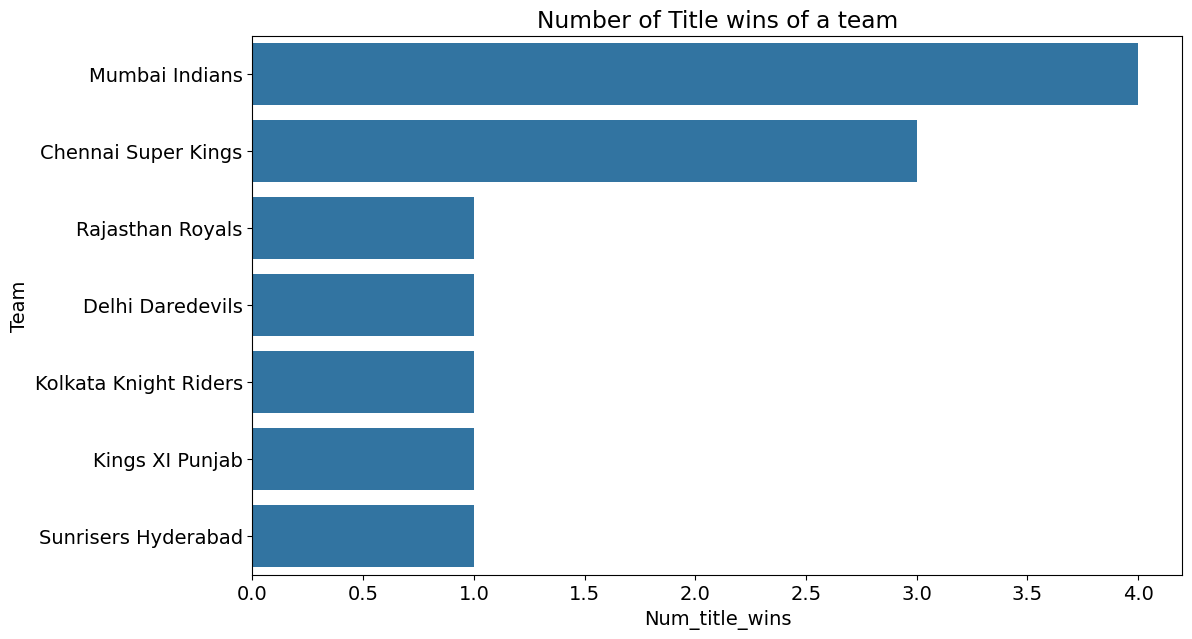

In [43]:
%matplotlib inline
sns.color_palette("Paired")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

num_title = Winners_of_each_season["Winner"].value_counts()
num_title_data = {"Team":[],"Num_title_wins":[]}
for items in num_title.items():
    num_title_data["Team"].append(items[0])
    num_title_data["Num_title_wins"].append(items[1])
num_title_df = pd.DataFrame(num_title_data)

plt.title("Number of Title wins of a team")
plot = sns.barplot(x = "Num_title_wins",y = "Team",data = num_title_df )

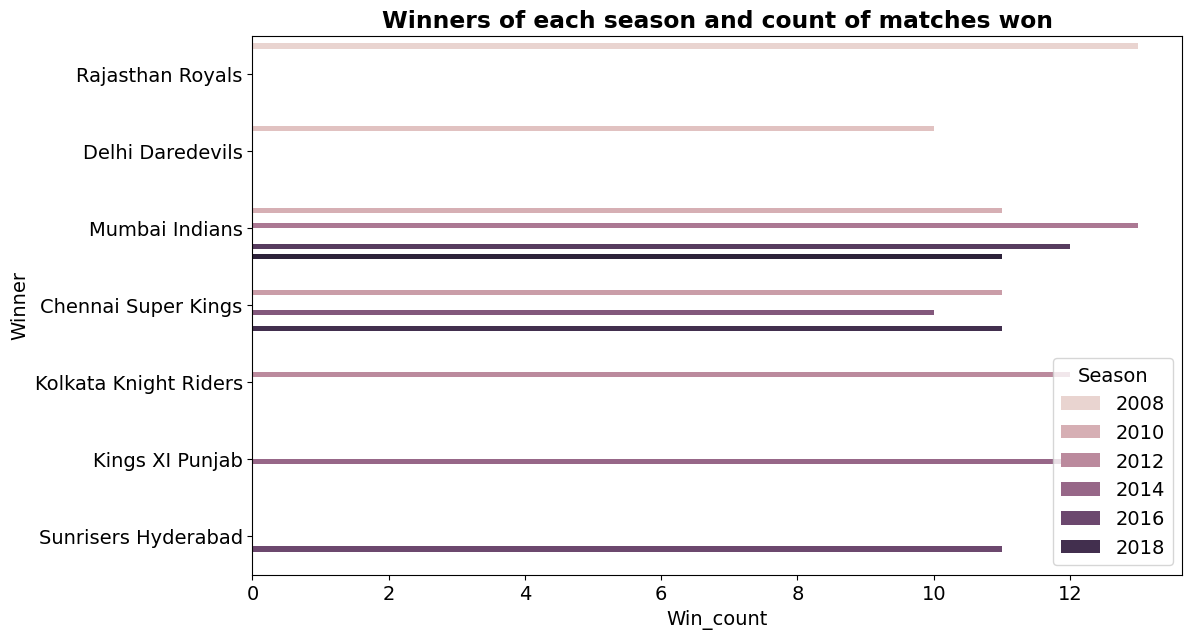

In [44]:
# using seaborn to get a bar plot
ax = sns.barplot(x = Winners_of_each_season['Win_count'], y = Winners_of_each_season['Winner'],hue = Winners_of_each_season['Season'])
plt.title('Winners of each season and count of matches won',fontweight = 'bold')
plt.show()

## Over all, Total Number of wins per team

In [46]:
wins_per_season_df = pd.DataFrame(wins_per_season_data)
wins_count_by_team = wins_per_season_df.groupby('Winner')['Win_count'].sum()
wins_count_by_team = wins_count_by_team.sort_values(ascending=False)
wins_count_by_team
wins_count_by_team_data = {"Team":[],"Num_wins":[]}
for items in wins_count_by_team.items():
    wins_count_by_team_data["Team"].append(items[0])
    wins_count_by_team_data["Num_wins"].append(items[1])
wins_count_by_team_df = pd.DataFrame(wins_count_by_team_data)
wins_count_by_team_df

,Team,Num_wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


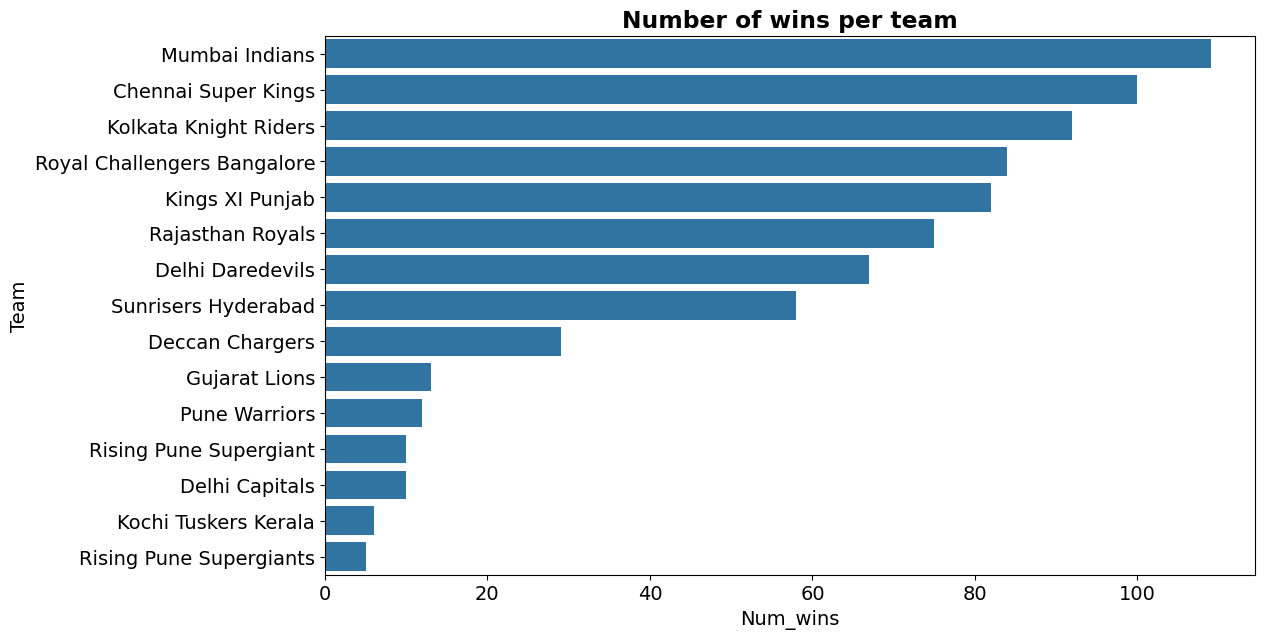

In [47]:
plt.title("Number of wins per team",fontweight = 'bold')
ax = sns.barplot(x = "Num_wins",y = "Team",data = wins_count_by_team_df)
plt.show()

### Mumbai Indians is the most successful team in IPL being won 4 ipl titles and 109 matches over all seasons followed by Chennai Super kings(3 titles,100 wins)..

# 2. Venue

In [48]:
match_venue = df1[["id","city","venue",]]
match_venue

,id,city,venue
0,1,Hyderabad,"Rajiv Gandhi International Stadium, Uppal"
1,2,Pune,Maharashtra Cricket Association Stadium
2,3,Rajkot,Saurashtra Cricket Association Stadium
3,4,Indore,Holkar Cricket Stadium
4,5,Bangalore,M Chinnaswamy Stadium
...,...,...,...
751,11347,Mumbai,Wankhede Stadium
752,11412,Chennai,M. A. Chidambaram Stadium
753,11413,Visakhapatnam,ACA-VDCA Stadium
754,11414,Visakhapatnam,ACA-VDCA Stadium


## Ipl venue where most number of matches were held

In [50]:
num_matches_in_stadium = match_venue['venue'].value_counts()
num_matches_in_stadium_data = {"venue":[],"count":[]}
for items in num_matches_in_stadium.items():
    num_matches_in_stadium_data["venue"].append(items[0])
    num_matches_in_stadium_data["count"].append(items[1])
    
num_matches_in_stadium_df = pd.DataFrame(num_matches_in_stadium_data)
num_matches_in_stadium_df

,venue,count
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Subrata Roy Sahara Stadium,17


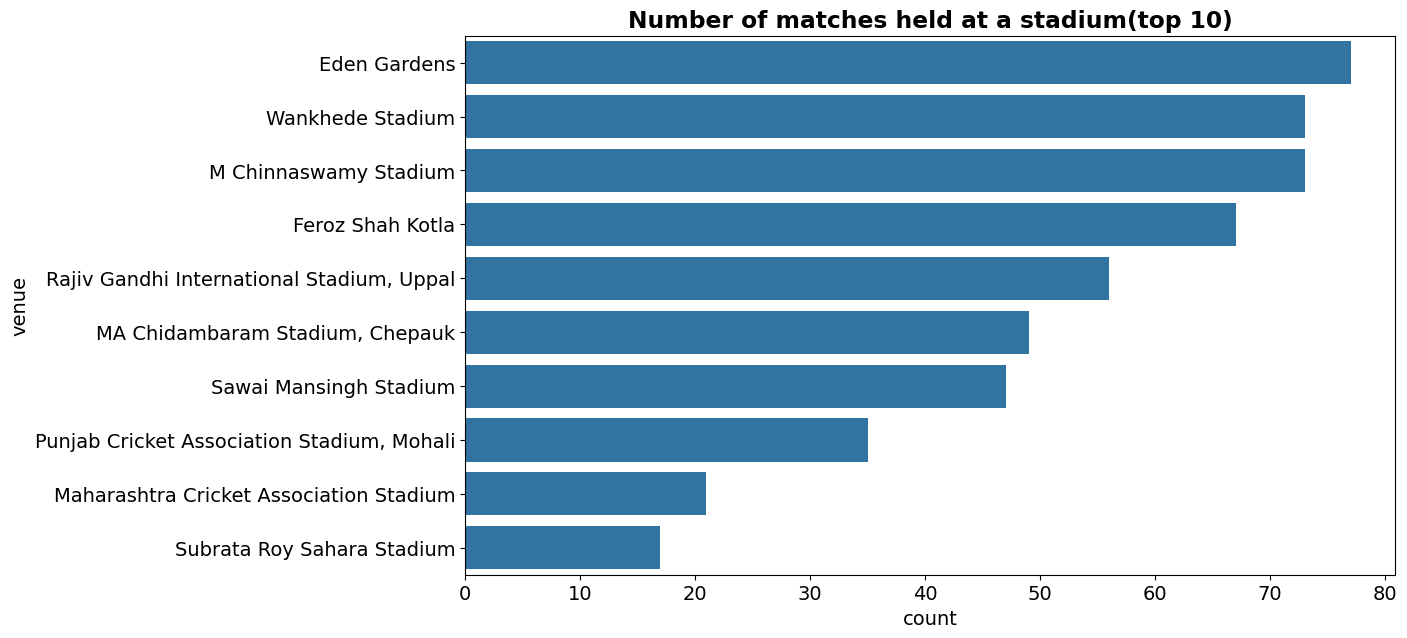

In [51]:
plt.title("Number of matches held at a stadium(top 10)",fontweight = 'bold')
ax = sns.barplot(x = "count",y = "venue",data = num_matches_in_stadium_df.head(10))
plt.show()

## Number of different stadiums in a city

In [53]:
# number of stadiums in a city
num_venue_in_city = match_venue.groupby('city')['venue'].unique()
num_venue_in_city_data = {"city":[],"count":[]}
for items in num_venue_in_city.items():
    num_venue_in_city_data["city"].append(items[0])
    num_venue_in_city_data["count"].append(len(items[1]))
num_venue_in_city_df = pd.DataFrame(num_venue_in_city_data)
num_venue_in_city_df = num_venue_in_city_df.sort_values('count',ascending = False)
num_venue_in_city_df

,city,count
24,Mumbai,3
27,Pune,2
3,Bengaluru,2
7,Chandigarh,2
8,Chennai,2
15,Hyderabad,2
32,Visakhapatnam,2
23,Mohali,2
10,Delhi,2
0,Abu Dhabi,1


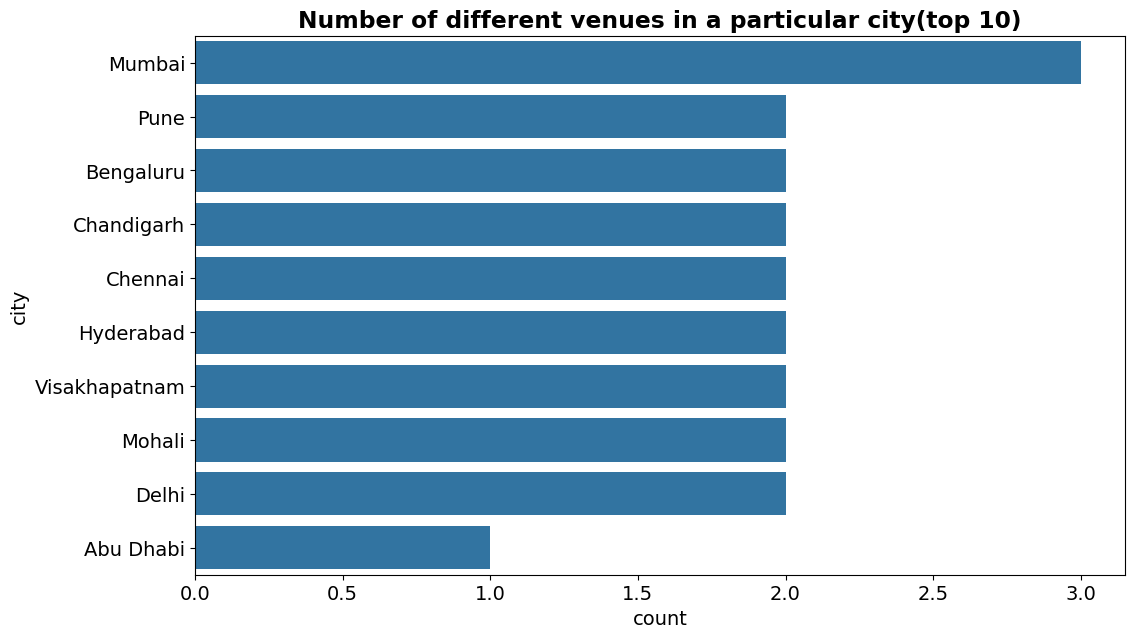

In [54]:
plt.title("Number of different venues in a particular city(top 10)",fontweight = 'bold')
ax = sns.barplot(x = "count",y = "city",data = num_venue_in_city_df.head(10))
plt.show()

### In Eden Gardens(stadium) most number of matches were played and Mumbai city has most number of venues

# 3.Toss Statistics

## What decision is made after winning the toss?

In [55]:
# what decision is made after winning the toss?
toss = df1.loc[:,"team1":"winner"]
toss

,team1,team2,toss_winner,toss_decision,result,dl_applied,winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore
...,...,...,...,...,...,...,...
751,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians
752,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians
753,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals
754,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings


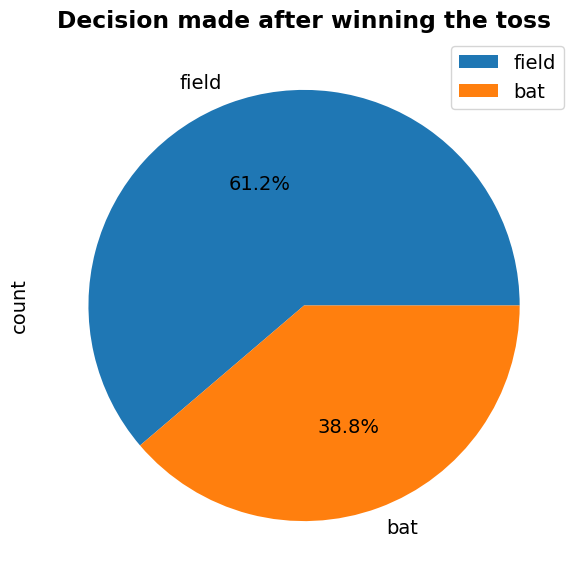

In [58]:
toss_decision = toss["toss_decision"].value_counts()
plt.title("Decision made after winning the toss",fontweight = 'bold')
plot = toss_decision.plot(kind = 'pie',fontsize=14,autopct = '%3.1f%%',legend = True)

#### After winning the toss 61.2% of time toss winning team elected to field first

## How toss result effected the match result

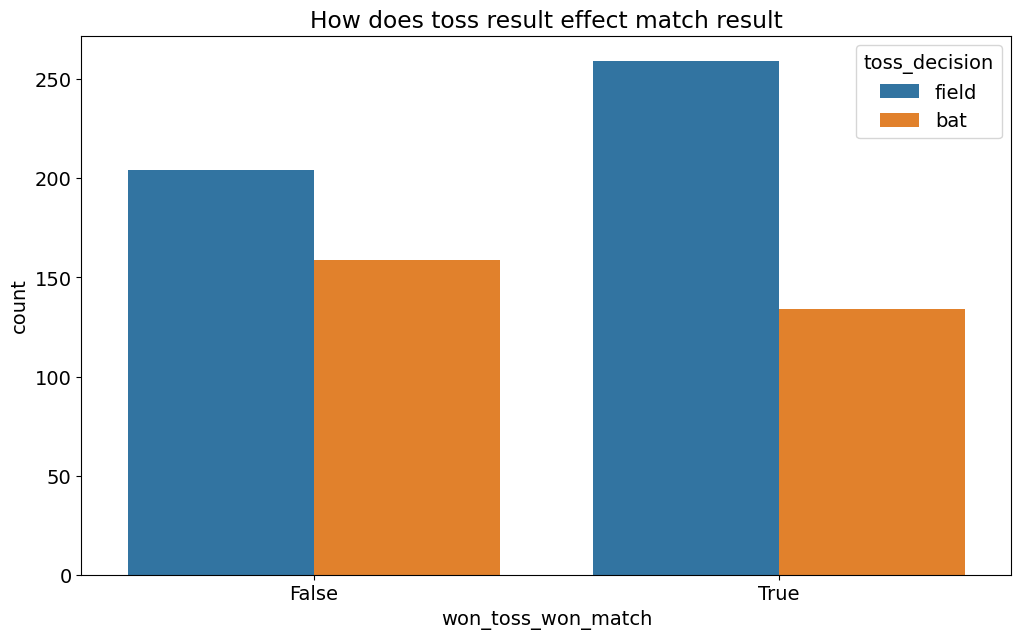

In [59]:
# matches won batting first and matches won batting second
toss["won_toss_won_match"] = np.where((toss.toss_winner == toss.winner),"True","False")
plt.title("How does toss result effect match result")
ax = sns.countplot(x = "won_toss_won_match",data = toss,hue = "toss_decision")

### From the above countplot we can say that, if a teams wins a toss then it should definitely choose to field first

## How each team chose after winning the toss

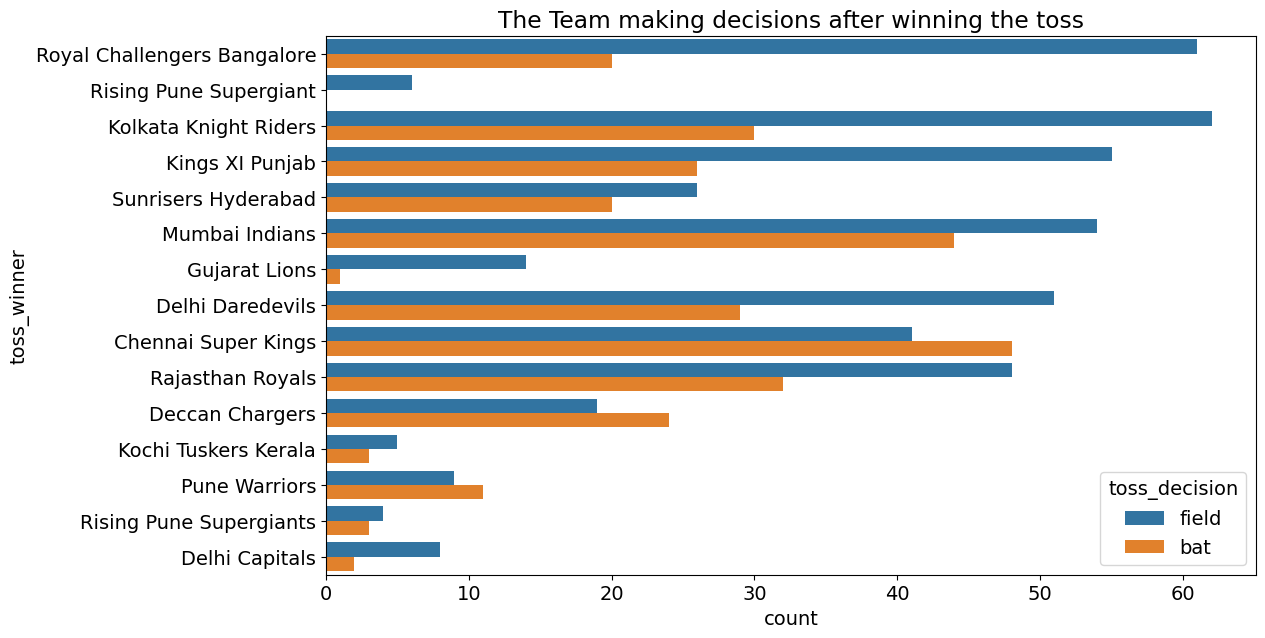

In [60]:
# How does a particular team make decisions after winning the toss
plt.title("The Team making decisions after winning the toss")
ax = sns.countplot(y = "toss_winner",data = toss,hue = "toss_decision")

### We can observe that most of the teams have choosen to field first when won the toss

## Which team has won most number of tosses

In [62]:
# number of toss wins of each team
num_toss_win_team = toss["toss_winner"].value_counts()
num_toss_win_team_data = {"Team":[],"Count":[]}
for items in num_toss_win_team.items():
    num_toss_win_team_data["Team"].append(items[0])
    num_toss_win_team_data["Count"].append(items[1])
num_toss_win_team_df = pd.DataFrame(num_toss_win_team_data)
num_toss_win_team_df

,Team,Count
0,Mumbai Indians,98
1,Kolkata Knight Riders,92
2,Chennai Super Kings,89
3,Kings XI Punjab,81
4,Royal Challengers Bangalore,81
5,Delhi Daredevils,80
6,Rajasthan Royals,80
7,Sunrisers Hyderabad,46
8,Deccan Chargers,43
9,Pune Warriors,20


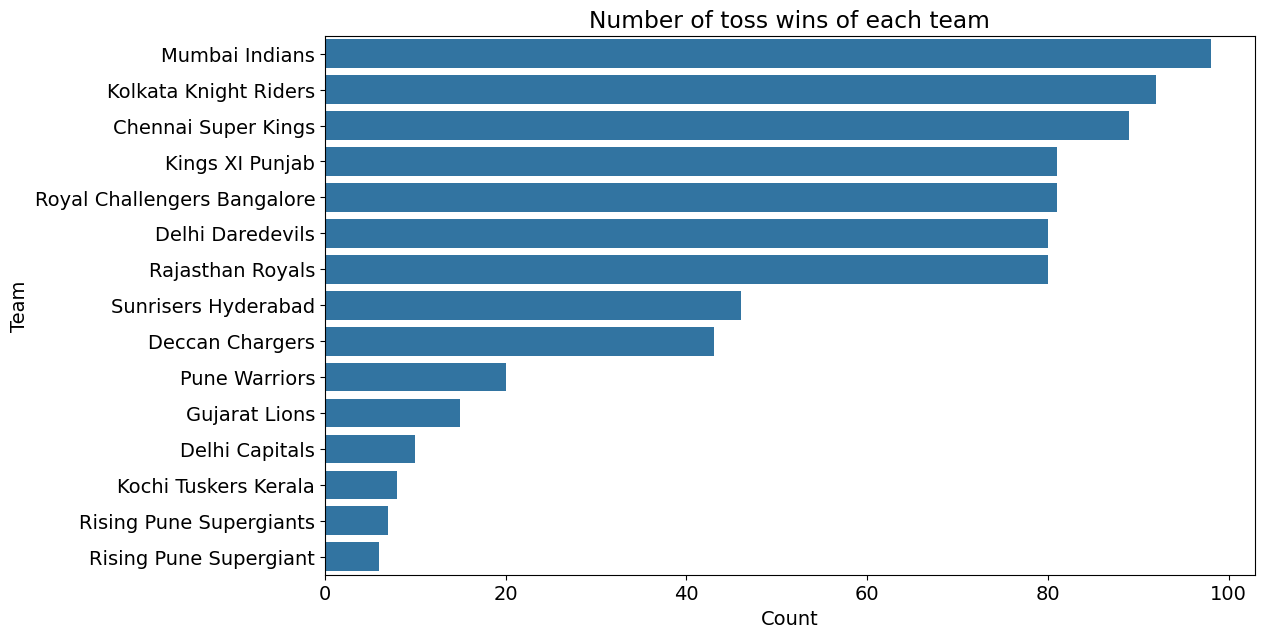

In [63]:
plt.title("Number of toss wins of each team")
ax = sns.barplot(x = "Count",y = "Team",data = num_toss_win_team_df )

### Mumbai Indians has won most number of tooses over all the seasons followed by KKR and CSK



# 4.Players Performance
## (a) Batting
### Players who won most number of MOM Awards

In [66]:
# who won most of the MOM Awards
Players_mom = df1["player_of_match"].value_counts() 
Players_mom_data = {"Player":[],"Num_awards":[]}
for items in Players_mom.items():
    Players_mom_data["Player"].append(items[0])
    Players_mom_data["Num_awards"].append(items[1])
Players_mom_df = pd.DataFrame(Players_mom_data)
Players_mom_df.head(15)

,Player,Num_awards
0,CH Gayle,21
1,AB de Villiers,20
2,MS Dhoni,17
3,RG Sharma,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


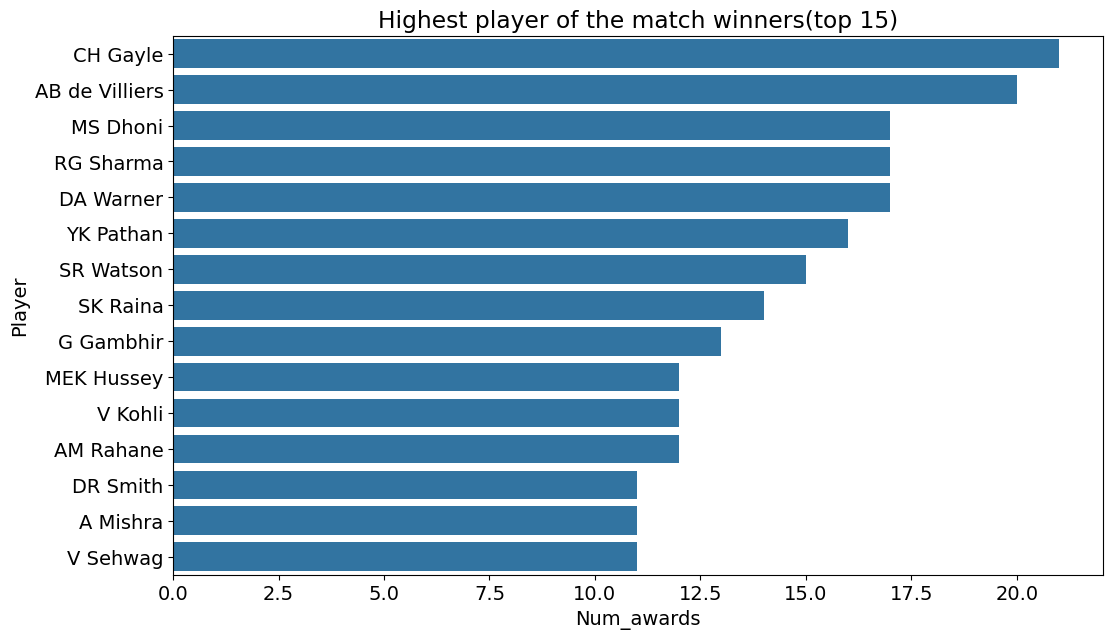

In [67]:
plt.title("Highest player of the match winners(top 15)")
ax = sns.barplot(x = "Num_awards",y = "Player",data = Players_mom_df.head(15))

#### Chris Gayle has topped the list with 21 awards followed by ABdeVillers, David Warner...

## Total IPL runs per season

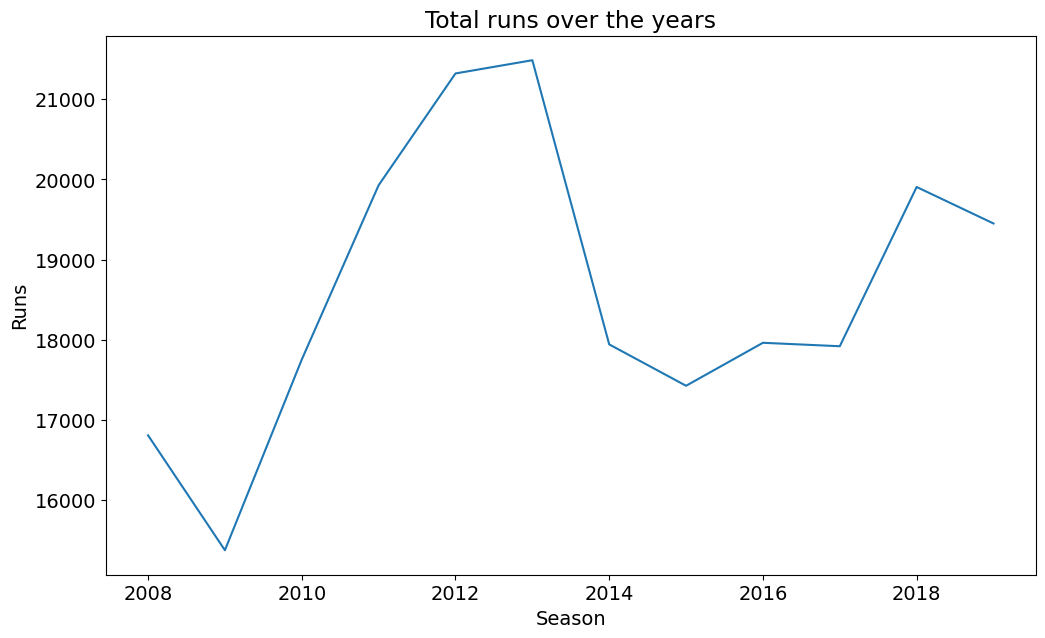

In [69]:
# total ipl runs scored over the years
ipl_runs_year = df.groupby('season')['batsman_runs'].sum()
Season = []
Runs = []
for items in ipl_runs_year.items():
    Season.append(items[0])
    Runs.append(items[1])
plt.plot(Season,Runs)
plt.xlabel("Season")
plt.ylabel("Runs")
plt.title("Total runs over the years")
plt.show()
    

## Top run scorers in IPL

In [71]:
# top run scorers
run_scorers = df.groupby("batsman")["batsman_runs"].sum()
run_scorers_data = {"batsman":[],"runs":[]}
for items in run_scorers.items():
    run_scorers_data["batsman"].append(items[0])
    run_scorers_data["runs"].append(items[1])
run_scorers_df = pd.DataFrame(run_scorers_data)
run_scorers_df = run_scorers_df.sort_values('runs',ascending = False)
run_scorers_df.head(10)

,batsman,runs
486,V Kohli,5434
428,SK Raina,5415
367,RG Sharma,4914
112,DA Warner,4741
392,S Dhawan,4632
92,CH Gayle,4560
290,MS Dhoni,4477
384,RV Uthappa,4446
26,AB de Villiers,4428
147,G Gambhir,4223


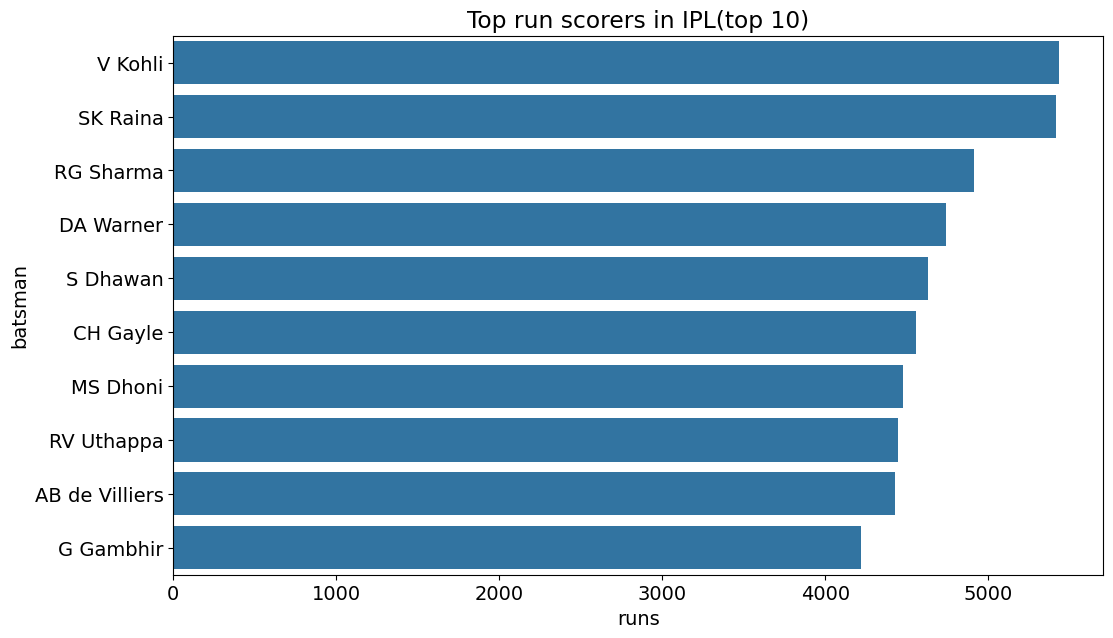

In [72]:
plt.title("Top run scorers in IPL(top 10)")
ax = sns.barplot(x = "runs",y = "batsman",data = run_scorers_df.head(10))

## Batting Averages of top 10 highest run scorers

In [73]:
# Batting Averages of top 10 highest run scorers
top_10 = ["V Kohli", "SK Raina", "RG Sharma", "DA Warner", "S Dhawan", "CH Gayle", "MS Dhoni", "RV Uthappa", "AB de Villiers", "G Gambhir"]
top_10_dict = {"V Kohli":0, "SK Raina":0, "RG Sharma":0, "DA Warner":0, "S Dhawan":0, "CH Gayle":0, "MS Dhoni":0, "RV Uthappa":0, "AB de Villiers":0, "G Gambhir":0}
filtered = df[df.batsman.isin(top_10)][["id","batsman","season","total_runs"]]
k = filtered.groupby(["id"])["batsman"].unique()
k = k.to_frame()
for i in k.iterrows():
    for ele in i[1][0]:
        top_10_dict[ele] += 1
matches = []
for val in top_10_dict.values():
    matches.append(val)
batsmen_data = run_scorers_df.head(10)
batsmen_data["matches"] = matches
batsmen_data["batting_avg"] = np.round(batsmen_data["runs"]/batsmen_data["matches"],decimals = 2)
batsmen_data = batsmen_data.sort_values('batting_avg',ascending=False)
batsmen_data

C:\Users\Tharun\AppData\Local\Temp\ipykernel_17652\645988237.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for ele in i[1][0]:
C:\Users\Tharun\AppData\Local\Temp\ipykernel_17652\645988237.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batsmen_data["matches"] = matches
C:\Users\Tharun\AppData\Local\Temp\ipykernel_17652\645988237.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

,batsman,runs,matches,batting_avg
112,DA Warner,4741,126,37.63
92,CH Gayle,4560,124,36.77
486,V Kohli,5434,169,32.15
26,AB de Villiers,4428,142,31.18
392,S Dhawan,4632,158,29.32
428,SK Raina,5415,189,28.65
147,G Gambhir,4223,151,27.97
367,RG Sharma,4914,182,27.00
290,MS Dhoni,4477,170,26.34
384,RV Uthappa,4446,170,26.15


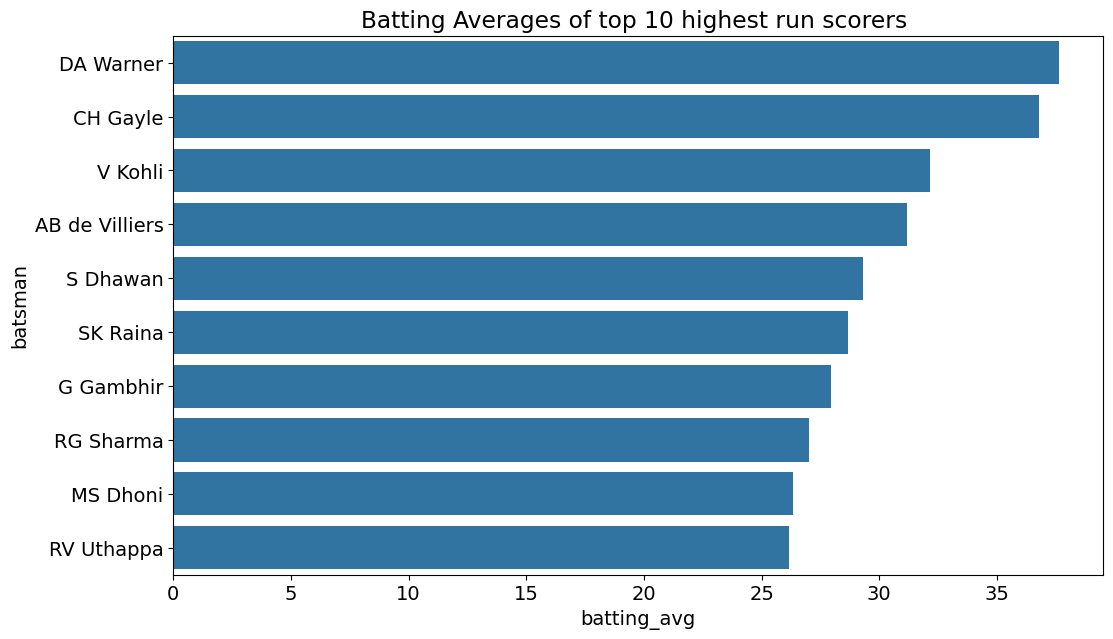

In [74]:
plt.title("Batting Averages of top 10 highest run scorers ")
ax = sns.barplot(x = "batting_avg",y = "batsman",data = batsmen_data)

#### David Warner has highest batting average followed by Chris Gayle , V Kohli ....

## Best Strike rate

In [75]:
num_balls_faced = pd.DataFrame(df.groupby("batsman")["ball"].count())
runs_by_batsmen = pd.DataFrame(df.groupby("batsman")["batsman_runs"].sum())
num_seasons_played = pd.DataFrame(df.groupby("batsman")["season"].nunique())

strike_rate_player = pd.DataFrame({"balls":num_balls_faced["ball"],"runs":runs_by_batsmen["batsman_runs"],"season":num_seasons_played["season"]})
strike_rate_player.reset_index(inplace=True)
strike_rate_player["strike_rate"] = strike_rate_player["runs"]/strike_rate_player["balls"]*100
top_strike_rate = strike_rate_player[strike_rate_player.season.isin([10,11])][["season","batsman","strike_rate"]].sort_values("strike_rate",ascending = False)
top_strike_rate.head(10)

,season,batsman,strike_rate
92,11,CH Gayle,145.640370
213,10,KA Pollard,141.751527
112,10,DA Warner,139.523249
444,11,SR Watson,136.945813
72,11,BB McCullum,127.332746
449,10,STR Binny,126.000000
118,11,DJ Bravo,125.565801
514,11,Yuvraj Singh,125.283190
53,10,AT Rayudu,124.058187
147,11,G Gambhir,119.835414


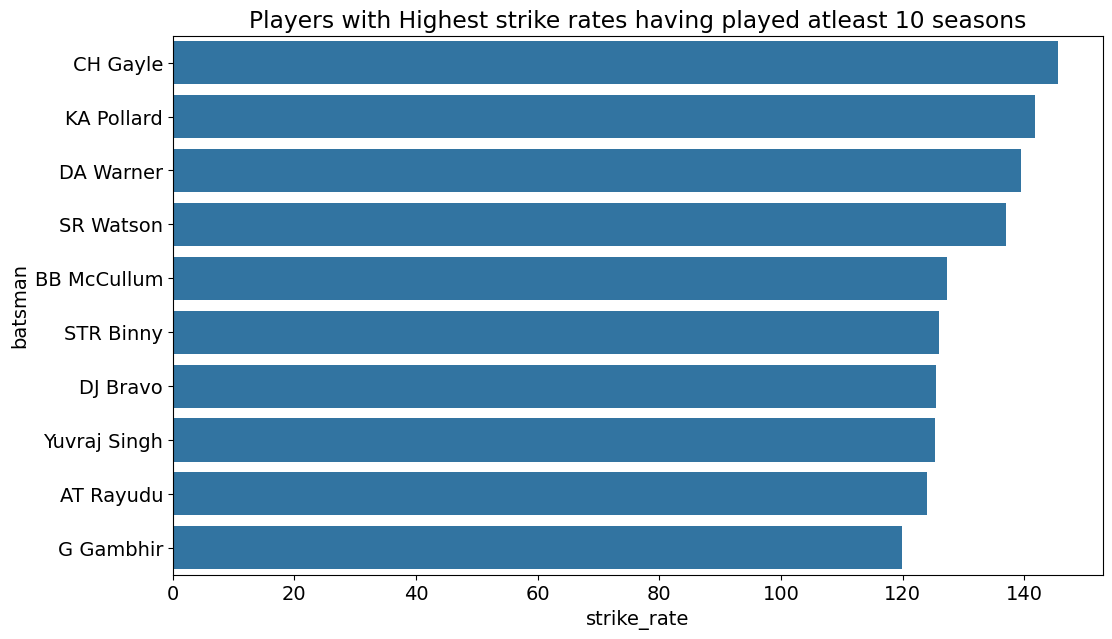

In [76]:
plt.title("Players with Highest strike rates having played atleast 10 seasons")
ax = sns.barplot(x = "strike_rate",y = "batsman",data = top_strike_rate.head(10))

#### Chris Gayle has highest strike rate of 145.6 followed by Pollard , Warner , Watson....

## (b) Bowling


In [77]:
# top 10 wicket takers in ipl
# bowled max num of deliveries
# bowlers who bowled max number of dot balls
# bowlers with most extras 
# consistent wicket takers 
# bowling average
# economy

## Top 10 ipl wicket takers

In [78]:
wickets = pd.DataFrame(df.groupby("bowler")["player_dismissed"].count())
wickets.sort_values("player_dismissed",ascending = False).head(10)

,player_dismissed
bowler,
SL Malinga,188
DJ Bravo,168
A Mishra,165
Harbhajan Singh,161
PP Chawla,156
B Kumar,141
R Ashwin,138
SP Narine,137
UT Yadav,136


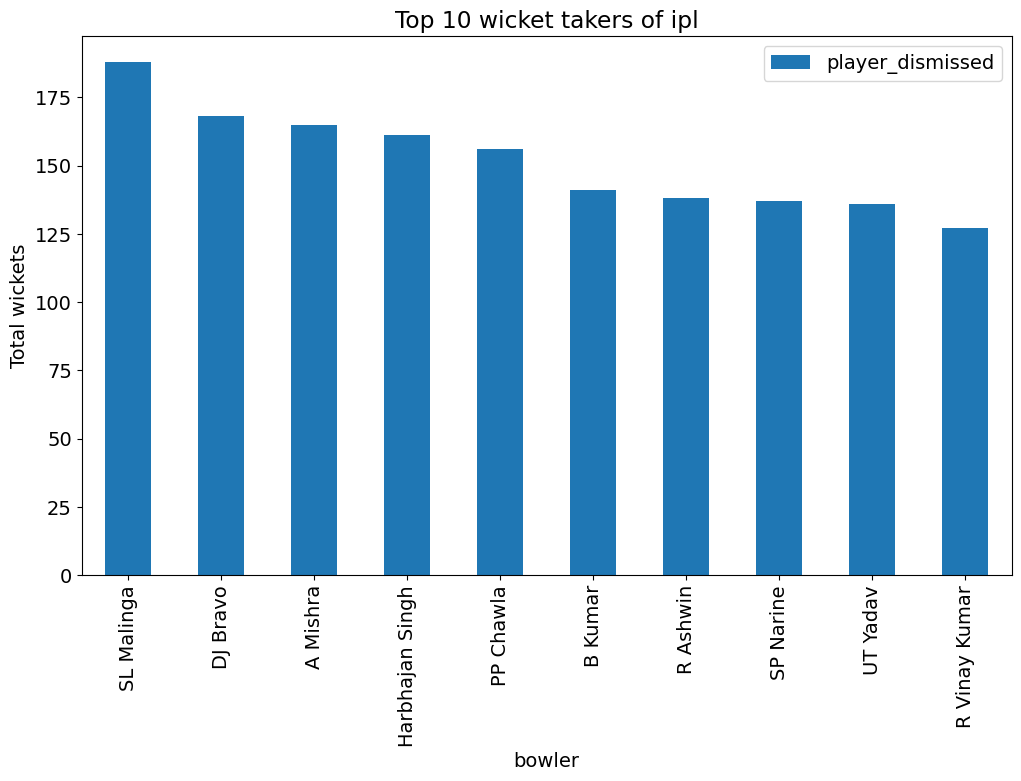

In [79]:
wickets.sort_values("player_dismissed",ascending = False).head(10).plot(kind = "bar")
plt.ylabel("Total wickets")
plt.title("Top 10 wicket takers of ipl")
plt.show()

#### Malinga has taken most number of wickets(188) followed by Bravo , Amit Mishra ...

## Maximum number of deliveries bowled

In [80]:
# bowled max num of deliveries
max_deliveries = pd.DataFrame(df["bowler"].value_counts())
max_deliveries.sort_values("bowler",ascending = False).head(10)

,count
bowler,
Z Khan,2276
Yuvraj Singh,882
YS Chahal,1841
YK Pathan,1184
YA Abdulla,222
Y Venugopal Rao,222
Y Nagar,72
Y Gnaneswara Rao,6
Washington Sundar,358


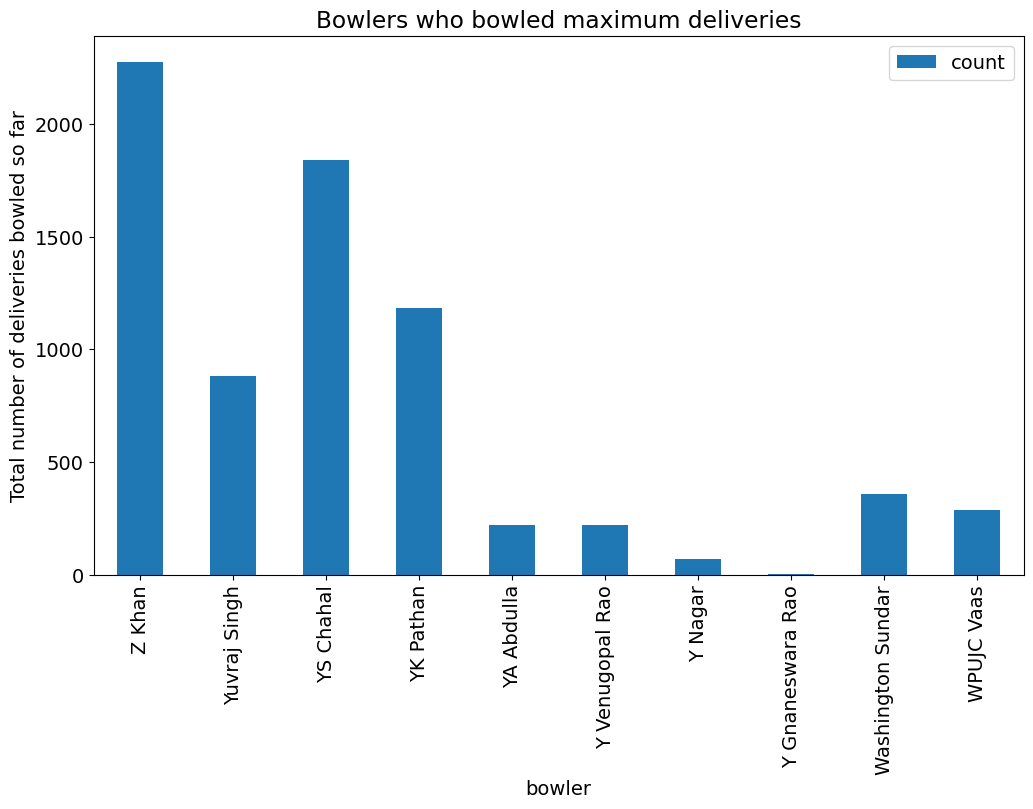

In [81]:
max_deliveries.sort_values("bowler",ascending = False).head(10).plot(kind = "bar")
plt.ylabel("Total number of deliveries bowled so far")
plt.title("Bowlers who bowled maximum deliveries")
plt.show()

#### Harbhajan Singh has bowled most number of deliveries followed by A Mishra , P Chawla ..

## Most dot deliveries bowled

In [82]:
# bowlers who bowled max number of dot balls

dot_balls = pd.DataFrame(df[df.total_runs.values == 0].groupby("bowler")["total_runs"].count())
dot_balls.sort_values("total_runs",ascending = False).head(10)

,total_runs
bowler,
Harbhajan Singh,1244
SL Malinga,1144
B Kumar,1116
A Mishra,1108
PP Chawla,1100
P Kumar,1075
R Ashwin,1067
SP Narine,1038
DW Steyn,996


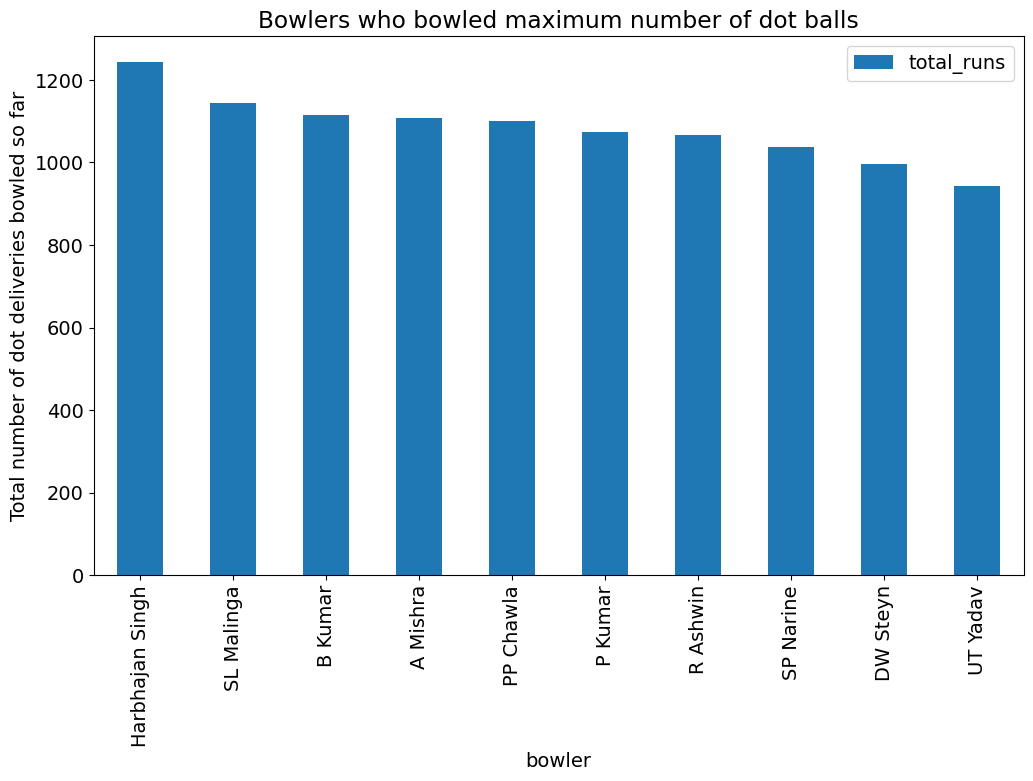

In [83]:
dot_balls.sort_values("total_runs",ascending = False).head(10).plot(kind = "bar")
plt.ylabel("Total number of dot deliveries bowled so far")
plt.title("Bowlers who bowled maximum number of dot balls")
plt.show()

####  Harbhajan Singh has bowled most number of dot deliveries followed by Malinga , B Kumar ...

## Bowlers conceding most extra runs

In [85]:
# bowlers with most extras
extras = pd.DataFrame(df[df.extra_runs.values != 0]["bowler"].value_counts())
extras.sort_values("bowler",ascending = False).head(10)

,count
bowler,
Z Khan,132
Yuvraj Singh,24
YS Chahal,82
YK Pathan,63
YA Abdulla,17
Y Venugopal Rao,7
Y Nagar,6
Washington Sundar,11
WPUJC Vaas,12


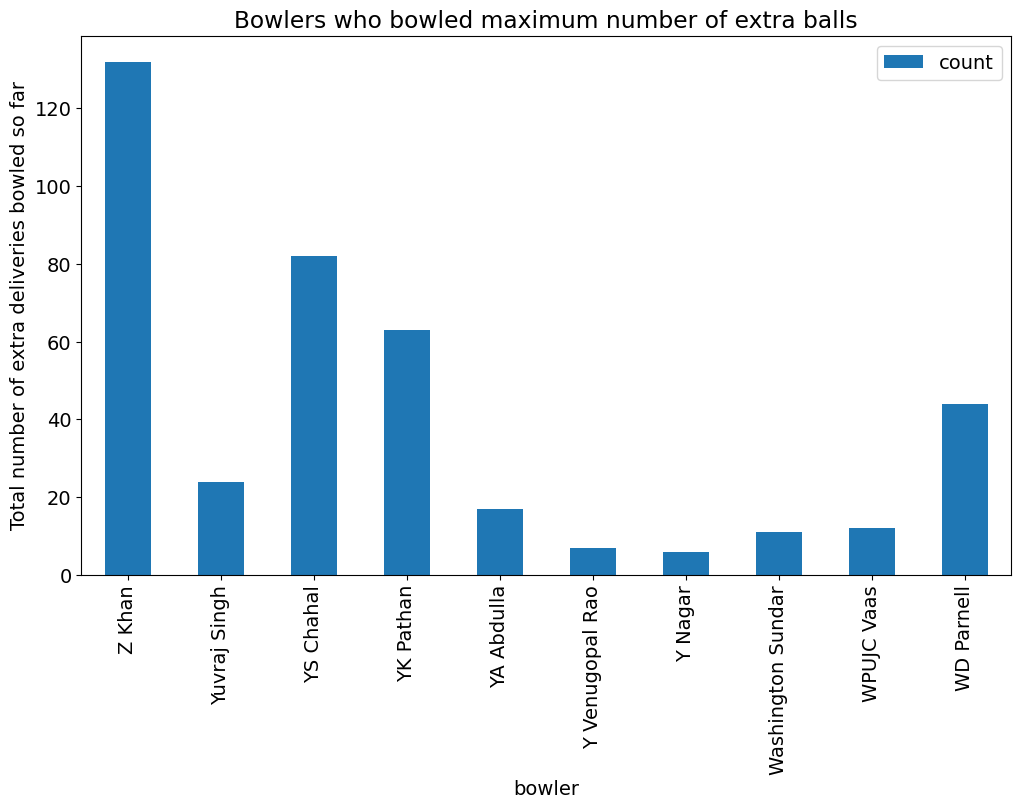

In [86]:
extras.sort_values("bowler",ascending = False).head(10).plot(kind = "bar")
plt.ylabel("Total number of extra deliveries bowled so far")
plt.title("Bowlers who bowled maximum number of extra balls")
plt.show()

#### Malinga has conceded most number of extra runs

## Bowling Strike rate

In [87]:
# bowler strike rate --> number of balls per wicket
deliveries_bowled = pd.DataFrame(df.groupby("bowler")["ball"].count())
wickets_taken = pd.DataFrame(df.groupby("bowler")["player_dismissed"].count())
num_seasons_played = pd.DataFrame(df.groupby("bowler")["season"].nunique())

bowler_strikeRate = pd.DataFrame({"balls_bowled":deliveries_bowled["ball"],"wickets":wickets_taken["player_dismissed"],"num_seasons":num_seasons_played["season"]})
bowler_strikeRate.reset_index(inplace = True)
bowler_strikeRate["Strike_Rate"] = bowler_strikeRate["balls_bowled"]/bowler_strikeRate["wickets"]
bowler_strikeRate = bowler_strikeRate.sort_values("Strike_Rate")
bowler_strikeRate = bowler_strikeRate[bowler_strikeRate["wickets"]>50]
bowler_strikeRate.head(10)

,bowler,balls_bowled,wickets,num_seasons,Strike_Rate
134,Imran Tahir,1249,82,6,15.231707
340,SL Malinga,2974,188,9,15.819149
93,DJ Bravo,2711,168,10,16.136905
9,A Nehra,1974,121,9,16.314050
225,MM Patel,1382,82,7,16.853659
158,JP Faulkner,1287,76,7,16.934211
74,CH Morris,1335,78,6,17.115385
358,Sandeep Sharma,1546,90,6,17.177778
281,R Vinay Kumar,2186,127,11,17.212598
28,AD Russell,1072,60,7,17.866667


#### Imran Tahir has lowest bowling striker rate implies that he takes less number of balls per wicket compared to other bowlers having played at least 5 seasons

In [88]:
### bowling average --> number of runs per wicket
runs_conceded = pd.DataFrame(df.groupby("bowler")["total_runs"].sum())
wickets_taken = pd.DataFrame(df.groupby("bowler")["player_dismissed"].count())
num_seasons_played = pd.DataFrame(df.groupby("bowler")["season"].nunique())

bowler_average = pd.DataFrame({"runs_conceded":runs_conceded["total_runs"],"wickets":wickets_taken["player_dismissed"],"num_seasons":num_seasons_played["season"]})
bowler_average.reset_index(inplace = True)
bowler_average["average"] = bowler_average["runs_conceded"]/bowler_average["wickets"]
bowler_average = bowler_average[bowler_average["wickets"]>50].sort_values("average").head(10) 
bowler_average

,bowler,runs_conceded,wickets,num_seasons,average
340,SL Malinga,3511,188,9,18.675532
134,Imran Tahir,1656,82,6,20.195122
301,Rashid Khan,1257,60,3,20.950000
9,A Nehra,2537,121,9,20.966942
225,MM Patel,1733,82,7,21.134146
347,SP Narine,2939,137,8,21.452555
358,Sandeep Sharma,1967,90,6,21.855556
93,DJ Bravo,3733,168,10,22.220238
74,CH Morris,1793,78,6,22.987179
53,B Kumar,3264,141,9,23.148936


#### Malinga has lowest bowling average which implies that he conceds less runs for taking a wicket compared to other bowlers

## Bowler Economy

In [89]:
## economy
# must have played atleast 5 seasons
runs_conceded = pd.DataFrame(df.groupby("bowler")["total_runs"].sum())
wickets_taken = pd.DataFrame(df.groupby("bowler")["player_dismissed"].count())
num_seasons_played = pd.DataFrame(df.groupby("bowler")["season"].nunique())
deliveries_bowled = pd.DataFrame(df.groupby("bowler")["ball"].count())

bowler_economy = pd.DataFrame({"runs_conceded":runs_conceded["total_runs"],"wickets":wickets_taken["player_dismissed"],
                               "num_seasons":num_seasons_played["season"],"balls_bowled":deliveries_bowled["ball"]})
bowler_economy["overs_bowled"] = bowler_economy["balls_bowled"]//6
bowler_economy["economy"] = bowler_economy["runs_conceded"]/bowler_economy["overs_bowled"]
bowler_economy = bowler_economy[bowler_economy["num_seasons"] > 5]
bowler_economy = bowler_economy[bowler_economy["wickets"]>50].sort_values("economy")
bowler_economy.head(10)

,runs_conceded,wickets,num_seasons,balls_bowled,overs_bowled,economy
bowler,,,,,,
DW Steyn,2454,104,10,2207,367,6.686649
M Muralitharan,1765,67,7,1581,263,6.711027
R Ashwin,3391,138,10,3016,502,6.754980
SP Narine,2939,137,8,2600,433,6.787529
Harbhajan Singh,4050,161,12,3451,575,7.043478
SL Malinga,3511,188,9,2974,495,7.092929
B Kumar,3264,141,9,2707,451,7.237251
A Mishra,3850,165,12,3172,528,7.291667
PP Ojha,2399,99,8,1945,324,7.404321


# 5.Umpires and win margins

## Umpires who has officiated the most number of IPL matches on-field

In [94]:
umpire1 = df1['umpire1'].value_counts()
umpire2 = df1['umpire2'].value_counts()

# Combine both umpire1 and umpire2 counts side-by-side
umpires_df = pd.concat([umpire1, umpire2], axis=1)
# Add counts from both columns
umpire_data = umpires_df.sum(axis=1)

# Collect results in a list instead of appending row by row
umpire_list = [{"umpire": ump, "matches": count} for ump, count in umpire_data.items()]

# Create final DataFrame
umpire_df = pd.DataFrame(umpire_list)

# Sort by match count
umpire_df = umpire_df.sort_values("matches", ascending=False)

# Display top 10
umpire_df.head(10)


,umpire,matches
2,S Ravi,106.0
0,HDPK Dharmasena,87.0
11,C Shamshuddin,73.0
3,AK Chaudhary,58.0
56,SJA Taufel,55.0
7,M Erasmus,54.0
1,Asad Rauf,51.0
9,Nitin Menon,42.0
6,BR Doctrove,42.0
8,RE Koertzen,41.0


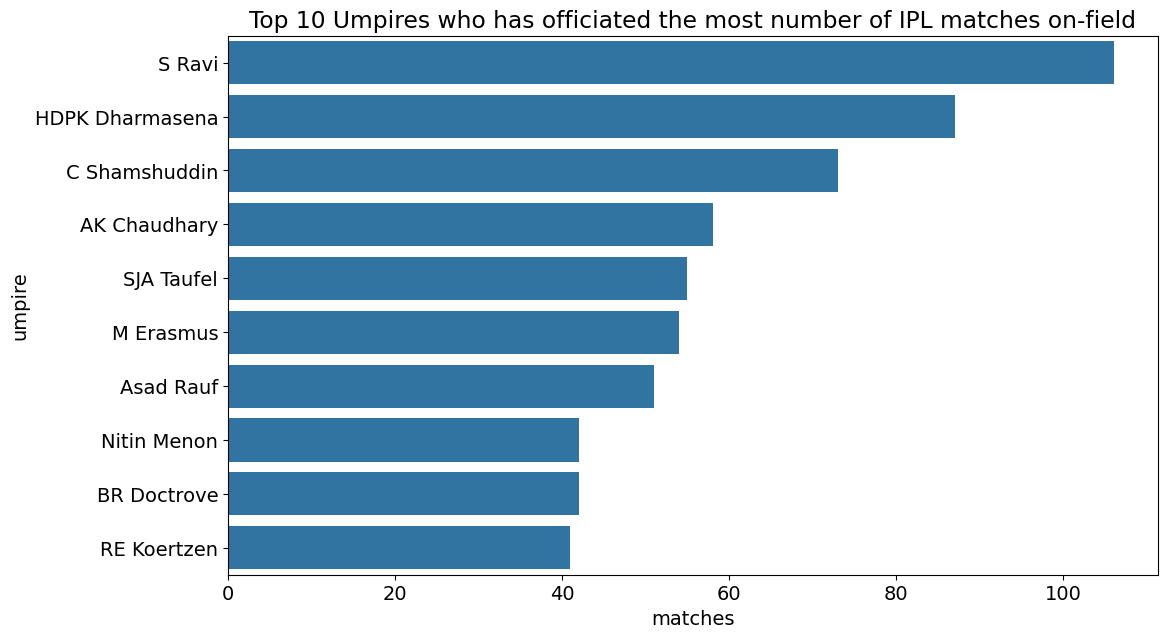

In [95]:
ax = sns.barplot(x="matches",y = "umpire", data = umpire_df.head(10))
plt.title("Top 10 Umpires who has officiated the most number of IPL matches on-field")
plt.show()

## Win margins (defending and chasing)

In [97]:
## total matches played
num_matches = len(df1)
num_matches

756

In [101]:
## matches won defending 
matches_won_defending = df1[df1["win_by_runs"] != 0]["win_by_runs"].count()
print(matches_won_defending)

337


In [100]:
## matches won chasing
matches_won_chasing = num_matches - matches_won_defending
print(matches_won_chasing)

419


In [102]:
## Highest win margin defending
batting_first = df1.sort_values("win_by_runs",ascending = False)
batting_first.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan


In [103]:
chasing = df1.sort_values("win_by_wickets",ascending = False)
chasing.head(12)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
298,299,2011,Mumbai,2011-05-20,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel
683,7941,2018,Indore,14/05/18,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,UT Yadav,Holkar Cricket Stadium,Bruce Oxenford,Virender Kumar Sharma
34,35,2017,Chandigarh,2017-04-30,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan
590,591,2016,Rajkot,2016-04-21,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena
71,72,2008,Mumbai,2008-04-27,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri
542,543,2015,Delhi,2015-04-26,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi
183,184,2010,Bangalore,2010-03-18,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper
390,391,2013,Chandigarh,2013-04-10,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin
376,377,2012,Jaipur,2012-05-20,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin


* **Of the 756 IPL matches played from 2008 to 2019, 419 matches were won chasing the target. Hence, more victories were registered by teams chasing a total(batting second) than defending the total.**
* **The greatest victory in IPL on defending a total is for Mumbai Indians when they defeated Delhi Daredevils by 146 runs on 06 May 2017 at Feroz Shah Kotla stadium, Delhi.**
* **Of the 756 IPL matches played from 2008 to 2019, 350 matches were won defending the total.**
* **When chasing a target, the biggest victory was by 10 wickets(without losing any wickets). There were 11 such instances.**

## key Inferences and Conclusion:

* **Mumbai Indians is the most successful team in IPL and has won the most number of toss.**
* **There were more matches won by chasing the total(419 matches) than defending(350 matches).**
* **When defending a total, the biggest victory was by 146 runs (Mumbai Indians defeated Delhi Daredevils on 06 May 2017 at Feroz Shah Kotla stadium, Delhi).**
* **When chasing a target, the biggest victory was by 10 wickets (without losing any wickets) and there were 11 such instances.**
* **Mumbai city has hosted the most number of IPL matches.**
* **Chris Gayle has won the maximum number of Player of the Match titles.**
* **S. Ravi (Sundaram Ravi) has officiated the most number of IPL matches on-field.**
* **Eden Gardens has hosted the maximum number of IPL matches.**
* **If a team wins a toss, choosing to field first gives a higher probability of winning.**
* **Top consistent batsmen: V Kohli, S Raina, Rohit Sharma, David Warner**
* **Top game-changing batsmen: Chris Gayle, AB de Villiers, R Sharma, MS Dhoni**
* **Top high-run scorers: DA Warner, CH Gayle, V Kohli, AB de Villiers, S Dhawan**
* **Top finishers (lower order, high strike rate): CH Gayle, KA Pollard, DA Warner, SR Watson, BB McCullum**
* **Top experienced bowlers: Harbhajan Singh, A Mishra, PP Chawla, R Ashwin, SL Malinga, DJ Bravo**
* **Top wicket-taking bowlers: SL Malinga, DJ Bravo, A Mishra, Harbhajan Singh, PP Chawla**
* **Top dot-ball bowlers: Harbhajan Singh, SL Malinga, B Kumar, A Mishra, PP Chawla**
* **Top economical bowlers: DW Steyn, M Muralitharan, R Ashwin, SP Narine, Harbhajan Singh**




## References:
https://towardsdatascience.com/exploratory-data-analysis-of-ipl-matches-part-1-c3555b15edbb